In [1]:
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
from glob import glob
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [2]:
coco = COCO("/root/datasets/coco/annotations/person_keypoints_val2017.json")

loading annotations into memory...
Done (t=0.35s)
creating index...
index created!


In [23]:
img_info = coco.loadImgs(coco.getImgIds())[2]
img_info

{'license': 4,
 'file_name': '000000252219.jpg',
 'coco_url': 'http://images.cocodataset.org/val2017/000000252219.jpg',
 'height': 428,
 'width': 640,
 'date_captured': '2013-11-14 22:32:02',
 'flickr_url': 'http://farm4.staticflickr.com/3446/3232237447_13d84bd0a1_z.jpg',
 'id': 252219}

In [27]:
annIds = coco.getAnnIds(imgIds=img_info['id'], iscrowd=None)
kp = coco.loadAnns(annIds)[0]['keypoints']
kp

[356,
 198,
 2,
 358,
 193,
 2,
 351,
 194,
 2,
 364,
 192,
 2,
 346,
 194,
 2,
 375,
 207,
 2,
 341,
 211,
 2,
 388,
 236,
 2,
 336,
 238,
 2,
 392,
 263,
 2,
 343,
 242,
 2,
 373,
 271,
 2,
 347,
 272,
 2,
 372,
 316,
 2,
 348,
 318,
 2,
 372,
 353,
 2,
 355,
 354,
 2]

In [38]:
coco.loadAnns(annIds)[0]['area']

8511.1568

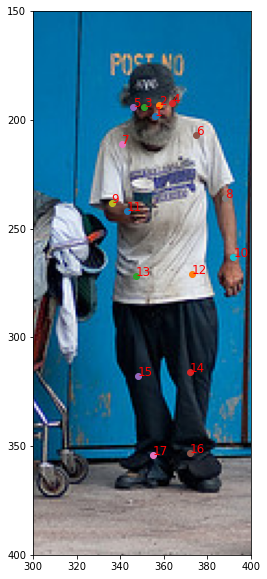

In [37]:
img = io.imread('/root/datasets/coco/val2017/{}'.format(img_info['file_name']))
plt.imshow(img)

i = 0
while i < len(kp):
    x, y, v = kp[i], kp[i+1], kp[i+2]
    i += 3
    if v != 0:
        plt.scatter(x, y)
        plt.text(x, y, i // 3, fontsize=12, color='red')
        
plt.xlim([300, 400])
plt.ylim([400, 150])
plt.show()

In [30]:
idx = [19, 20, 21, 22, 23, 9, 8, 10, 7, 11, 6, 3, 2, 4, 1, 5, 0]
np.array(['Right Ankle',
'Right Knee',
'Right Hip',
'Left Hip',
'Left Knee',
'Left Ankle',
'Right Wrist',
'Right Elbow',
'Right Shoulder',
'Left Shoulder',
'Left Elbow',
'Left Wrist',
'Neck (LSP)',
'Top of Head (LSP)',
'Pelvis (MPII)',
'Thorax (MPII)',
'Spine (H36M)',
'Jaw (H36M)',
'Head (H36M)',
'Nose',
'Left Eye',
'Right Eye',
'Left Ear',
'Right Ear'])[idx]

array(['Nose', 'Left Eye', 'Right Eye', 'Left Ear', 'Right Ear',
       'Left Shoulder', 'Right Shoulder', 'Left Elbow', 'Right Elbow',
       'Left Wrist', 'Right Wrist', 'Left Hip', 'Right Hip', 'Left Knee',
       'Right Knee', 'Left Ankle', 'Right Ankle'], dtype='<U17')